### DIABETES EDA PROJECT

In [38]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.shape

(768, 9)

 #### Data Cleaning

In [40]:
#check for datatpes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
#zero values
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    print(f"{col} has {(df[col] == 0).sum()} zero values")

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


In [43]:
# replace 0s with NaN
import numpy as np

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [44]:
# check for how many are missing
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [45]:
# filling the data 
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())

In [46]:
# drop insulin column
df.drop('Insulin', axis=1, inplace=True)

#### Exploratory Data Analysis

In [47]:
!pip install seaborn

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

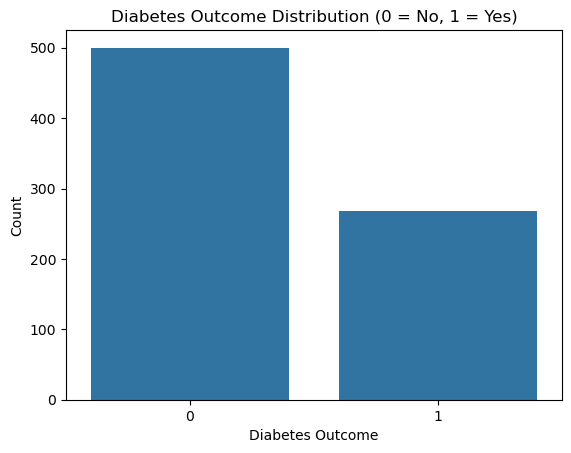

In [50]:
# Target Variable Distribution

sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution (0 = No, 1 = Yes)')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.savefig('Diabetes_Outcome_Distribution.png', dpi=300, bbox_inches='tight')

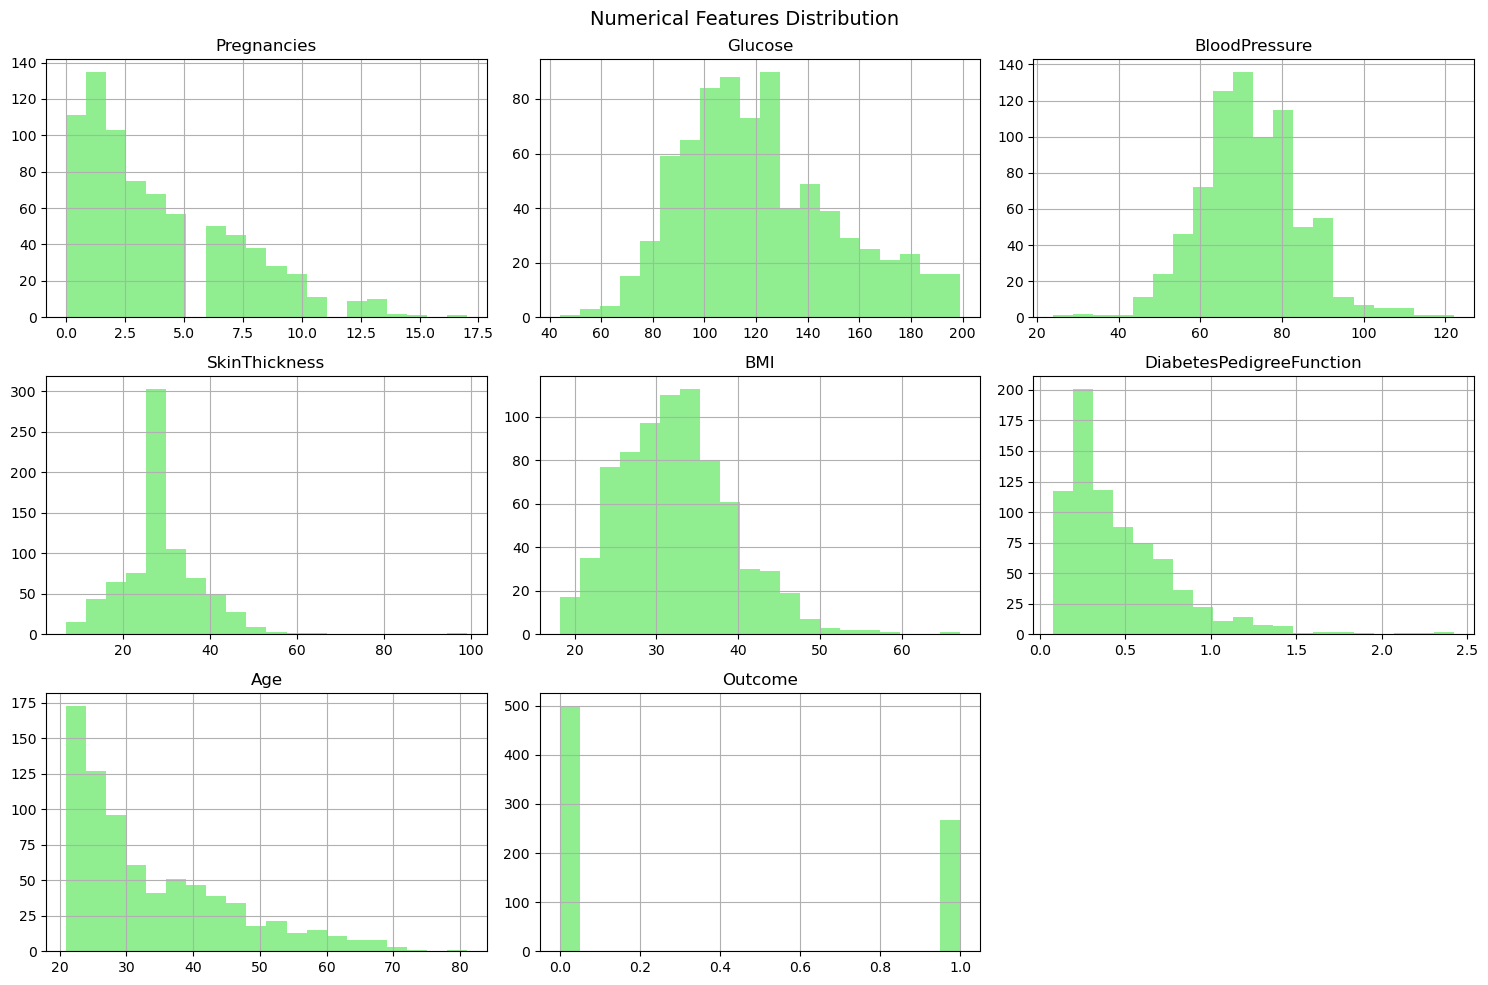

In [51]:
# Numerical Features Distribution

df.hist(bins=20, figsize=(15, 10), color='lightgreen')
plt.suptitle('Numerical Features Distribution', fontsize=14)
plt.tight_layout()
plt.savefig('Diabetes_Outome_Across_Age_Groups.png', dpi=300, bbox_inches='tight')

In [52]:
# create age_group
df['Age_Group'] = pd.cut(df['Age'], 
                         bins = [20, 30, 40, 50, 60, 70, 80, 90],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

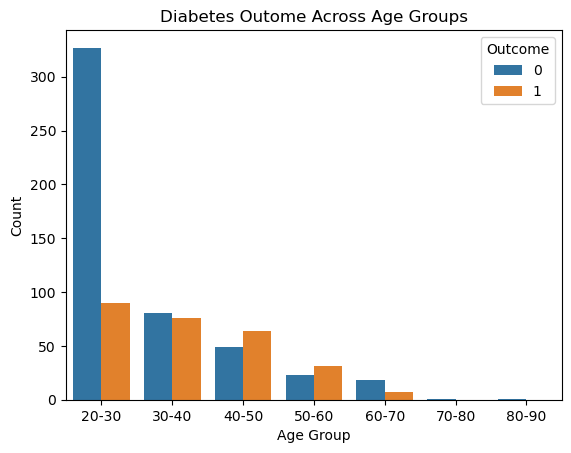

In [53]:
# Diabetes by age group

sns.countplot(x='Age_Group', hue='Outcome', data=df)
plt.title("Diabetes Outome Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.savefig('Diabetes_Outome_Across_Age_Groups.png', dpi=300, bbox_inches='tight')

In [54]:
# create BMI category
def bmi_category(bmi): 
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'
        
df['BMI_Category'] = df['BMI'].apply(bmi_category)

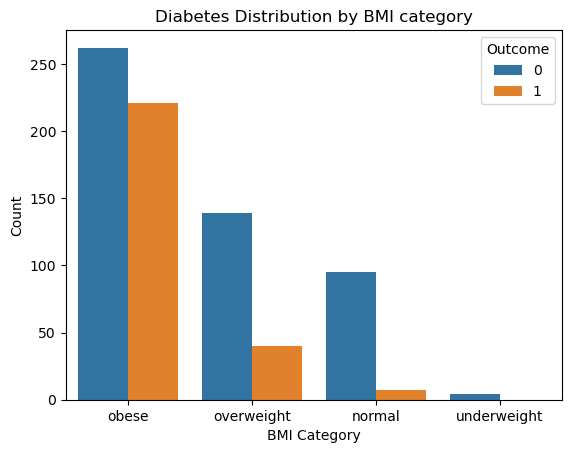

In [55]:
# Diabetes by BMI category

sns.countplot(x='BMI_Category', hue= 'Outcome', data=df)
plt.title('Diabetes Distribution by BMI category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.savefig('Diabetes_distribution _by_BMI_category.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
# mean comparison
df.groupby('Outcome')[['Glucose', 'BMI', 'Age', 'BloodPressure']].mean()

,Glucose,BMI,Age,BloodPressure
Outcome,,,,
0,110.710121,30.888434,31.190000,70.935397
1,142.165573,35.384757,37.067164,75.147324


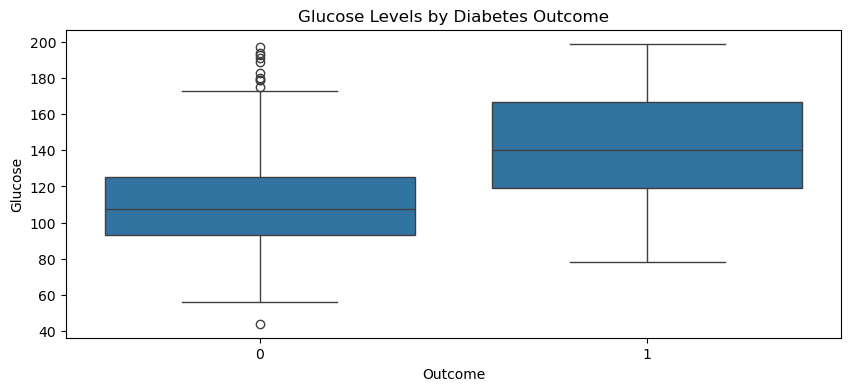

In [58]:
# Distribution by oucome for glucose
plt.figure(figsize=(10,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.savefig('Glucose_Levels_by_Diabetes Outcome.png', dpi=300, bbox_inches='tight')
plt.show()

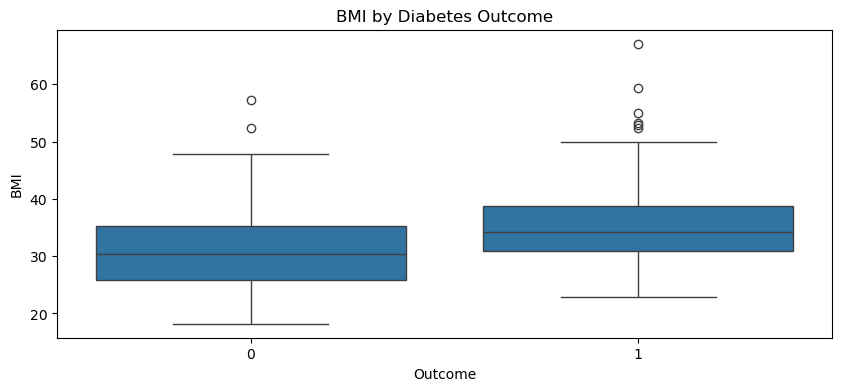

In [59]:
# Distribution by oucome for BMI
plt.figure(figsize=(10,4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Diabetes Outcome')
plt.savefig('BMI_by_Diabetes_Outcome.png', dpi=300, bbox_inches='tight')
plt.show()

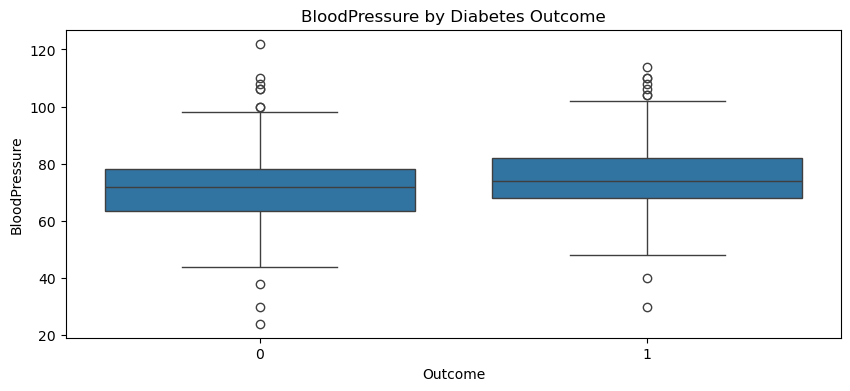

In [60]:
# Distribution by oucome for Bloodpressure
plt.figure(figsize=(10,4))
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.title('BloodPressure by Diabetes Outcome')
plt.savefig('BloodPressure_by_Diabetes_Outcome.png', dpi=300, bbox_inches='tight')
plt.show()

In [64]:
df = df.drop(columns=['Age_Group'])


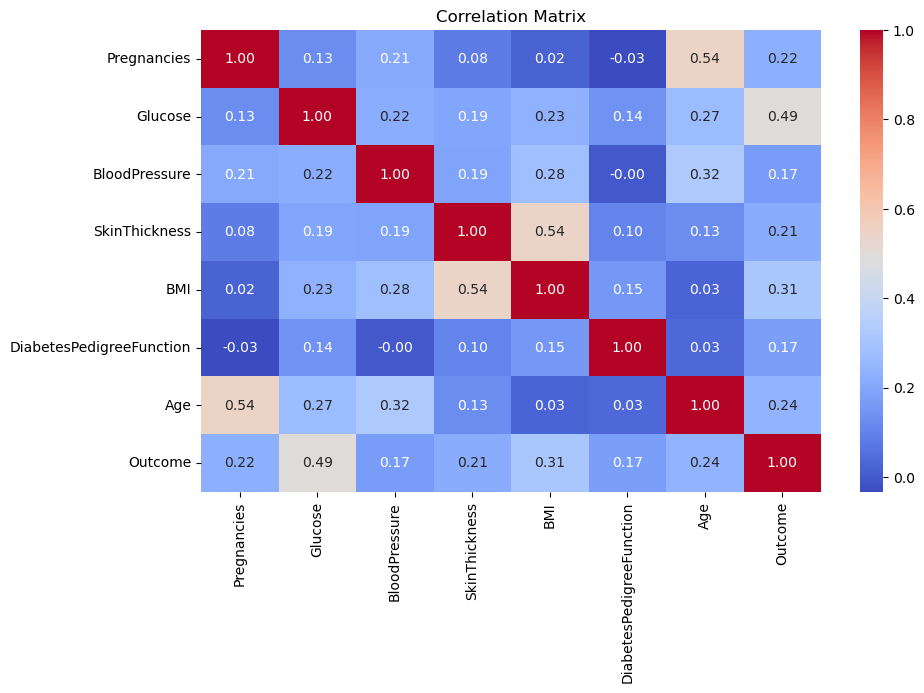

In [65]:
# Correlation heatmap
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

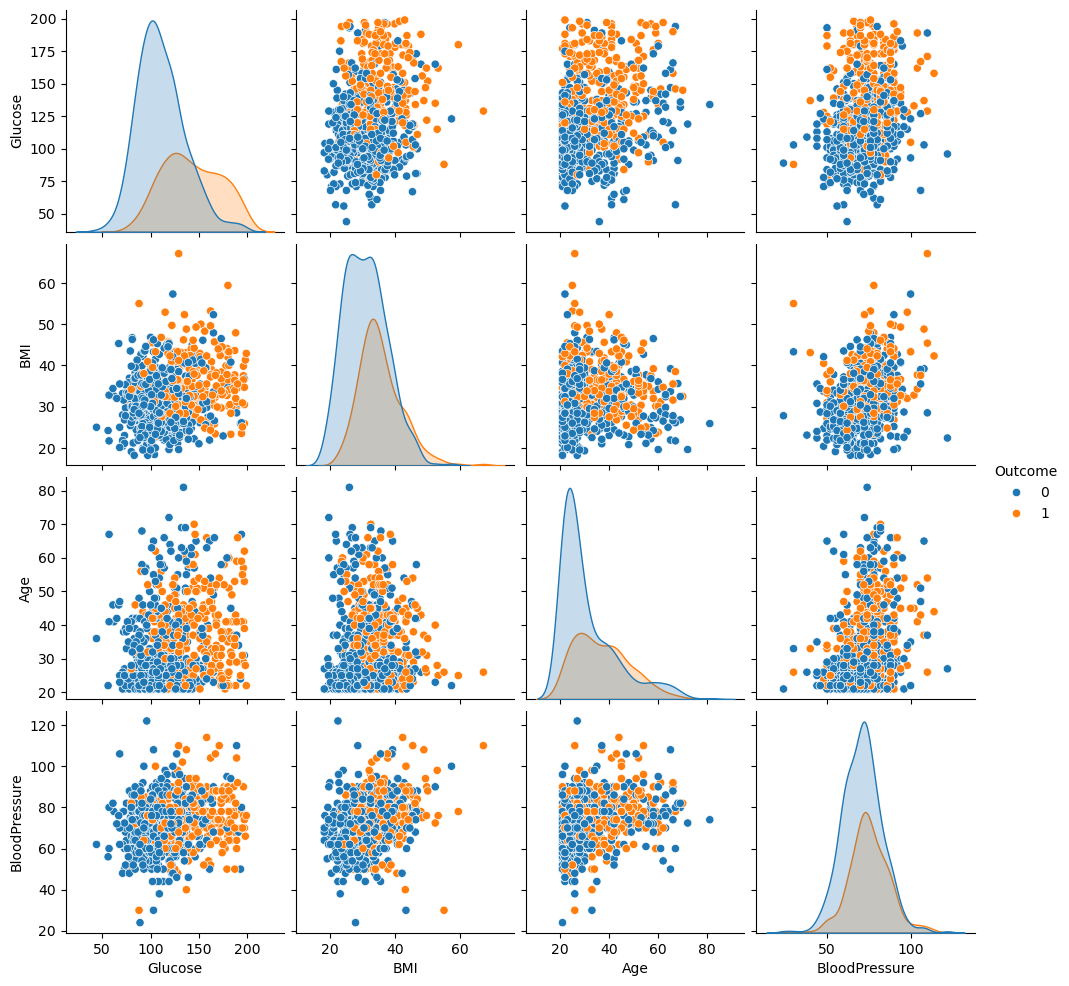

In [66]:
# pairplot of variables
selected = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Outcome']
sns.pairplot(df[selected], hue='Outcome')
plt.savefig('pairplot_of_metrics.png', dpi=300, bbox_inches='tight')